IBM Cloud deployment

In [1]:
!pip install tensorflow --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 17 kB/s 
     |████████████████████████████████| 5.9 MB 38.7 MB/s 
     |████████████████████████████████| 1.7 MB 38.3 MB/s 
     |████████████████████████████████| 438 kB 56.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [2]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #convolutional Layer
from keras.utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

In [4]:
(x_train, y_train), (x_test, y_test)=mnist.load_data () #splitting the mnist data into train and test

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
x_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

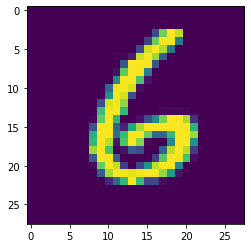

In [7]:
plt.imshow(x_train[6000])     #ploting the index=image


In [8]:
np.argmax(y_train[6000])

0

In [9]:
#Reshaping to format which CNN expects (batch, height, width, channels)
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

In [10]:
number_of_classes = 10  #storing the no of classes in a variable

In [11]:
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

In [12]:
#create model
model=Sequential ()

In [13]:
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [14]:
#flatten the dimension of the image
model.add(Flatten())


In [15]:
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

In [16]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [17]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [18]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)


Epoch 1/5
1875/1875 [==============================] - 181s 96ms/step - loss: 0.2243 - accuracy: 0.9511 - val_loss: 0.1021 - val_accuracy: 0.9692
Epoch 2/5
1875/1875 [==============================] - 184s 98ms/step - loss: 0.0649 - accuracy: 0.9798 - val_loss: 0.0788 - val_accuracy: 0.9768
Epoch 3/5
1875/1875 [==============================] - 179s 96ms/step - loss: 0.0461 - accuracy: 0.9853 - val_loss: 0.0833 - val_accuracy: 0.9769
Epoch 4/5
1875/1875 [==============================] - 179s 95ms/step - loss: 0.0329 - accuracy: 0.9898 - val_loss: 0.0920 - val_accuracy: 0.9777
Epoch 5/5
1875/1875 [==============================] - 178s 95ms/step - loss: 0.0273 - accuracy: 0.9916 - val_loss: 0.0924 - val_accuracy: 0.9789


In [19]:
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)


Metrics (Test loss &Test Accuracy) : 
[0.09241429716348648, 0.9789000153541565]


In [20]:
prediction=model.predict(x_test[6000:6001])
print(prediction)


1/1 [==============================] - 0s 117ms/step
[[2.2007969e-14 4.5870755e-17 5.6252540e-13 2.2555473e-09 2.7662969e-05
  1.4165484e-08 3.8581710e-16 2.8527800e-09 2.1310225e-06 9.9997020e-01]]


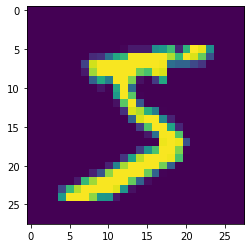

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
(train_images, train_labels) = datasets.mnist.load_data()
import matplotlib.pyplot as plt
train_images = train_images[0] / 255
plt.imshow(train_images[0])

In [23]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images


[9]


In [24]:
np.argmax(y_test[6000:6001]) #printing the actual labels

9

In [25]:
# Save the model
model.save('models/mnistCNN.h5')

In [26]:
cd models

/content/models


In [27]:
!tar -zcvf handwritten-digit-recognition-model_new.tgz mnistCNN.h5

mnistCNN.h5


In [28]:
!pip install watson-machine-learning-client --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 538 kB 7.2 MB/s 
     |████████████████████████████████| 55 kB 3.5 MB/s 
     |████████████████████████████████| 132 kB 56.5 MB/s 
     |████████████████████████████████| 79 kB 6.9 MB/s 
     |████████████████████████████████| 9.9 MB 48.0 MB/s 
     |████████████████████████████████| 140 kB 40.8 MB/s 
     |████████████████████████████████| 956 kB 66.6 MB/s 
     |████████████████████████████████| 135 kB 38.7 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.12.0-py3-none-any.whl size=73931 sha256=c1697b4c66dc91aa7d32d6a97ccdc12be82d2e30d321963440df836d5cf2cc32
  Stored in directory: /root/.cache/pip/wheels/ec/94/29/2b57327cf00664b6614304f7958abd29d77ea0e5bbece2ea57
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.12.0-py3-none-any.whl size=562962 sha256=44c8a0560a2